In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import read_csv

In [2]:
# Load dataset
heart_fail = "heart_failure_clinical_records_dataset.csv"
heart_dataset = read_csv(heart_fail)

In [4]:
# shape
print(heart_dataset.shape)

(299, 13)


In [5]:
# head
print(heart_dataset.head(20))

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  75.0        1                        81         0                 38   
11  62.0        0                       231         0                 25   
12  45.0    

In [6]:
# descriptions
print(heart_dataset.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [7]:
# class distribution
print(heart_dataset.groupby('DEATH_EVENT').size())

DEATH_EVENT
0    203
1     96
dtype: int64


In [12]:
# sub data-frame containing variables that are not boolean
sub_heart = heart_dataset[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine',  'serum_sodium']]

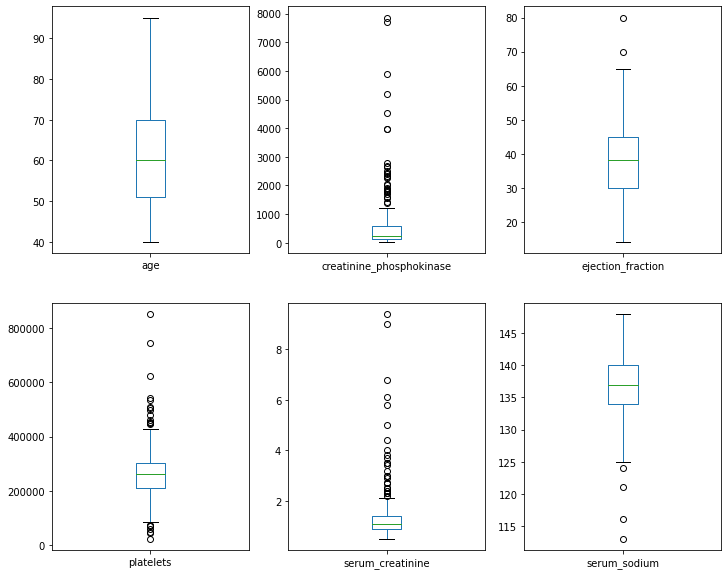

In [25]:
# box and whisker plots
sub_heart.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,10), sharex=False, sharey=False)
pyplot.show()

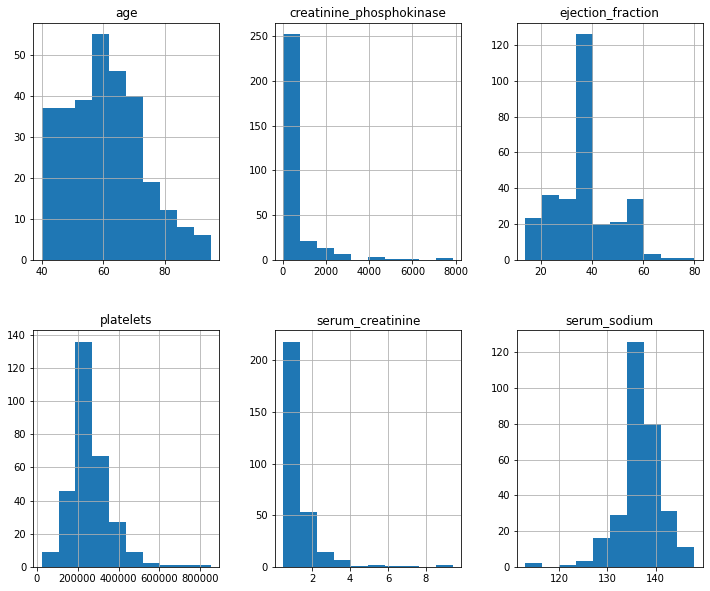

In [23]:
# histograms
sub_heart.hist(layout=(2,3), figsize=(12,10))
pyplot.show()

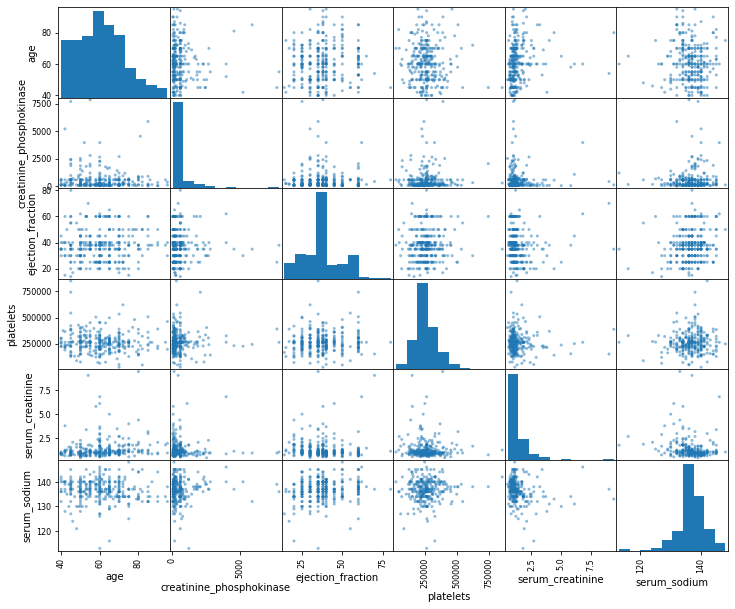

In [24]:
# scatter plot matrix
scatter_matrix(sub_heart, figsize=(12,10))
pyplot.show()

In [26]:
# Split-out validation dataset
heart_array = heart_dataset.values
X = heart_array[:,0:12]    # array with the numeric variables
y = heart_array[:,12]      # array with the death variable

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [27]:
# Spot Check Algorithms
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto'))]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.790399 (0.071323)
LDA: 0.790761 (0.049375)
KNN: 0.565036 (0.051778)
CART: 0.744384 (0.079419)
NB: 0.769203 (0.101531)
SVM: 0.656884 (0.016508)


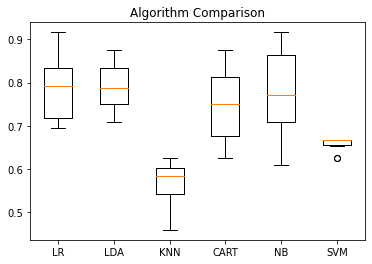

In [28]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [29]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [30]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[42  4]
 [ 4 10]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        46
         1.0       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60



In [68]:
model.predict([[51, 1, 43, 0, 15, 1, 555555, 0.7, 135, 1, 1, 5]])[0]

1.0

In [75]:
model.predict([[51, 1, 43, 0, 38, 1, 555555, 0.7, 135, 1, 1, 5]])[0]

0.0